In [1]:
%matplotlib inline
import psluncert
import numpy as np
import sympy
sympy.init_printing()

# Stefan-Boltzmann Constant
## Example 10 from NIST Uncertainty Machine Manual

Reference: https://www.nist.gov/publications/uncertainty-machine-users-manual

In this example, the function is defined as a sympy expression instead of a string.


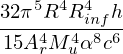

In [2]:
# Using sympy to build the expression. Note use of latex-style notations for subscripts
# and greek letters (alpha) converting to symbols
h, R, Rinf, Are, Mu, c, alpha = sympy.symbols('h R, R_inf A_r M_u c, alpha')
num = 32 * sympy.pi**5 * h * R**4 * Rinf**4
denom = 15 * Are**4 * Mu**4 * c**6 * alpha**8
sigma = num/denom
display(sigma)




Method            |Mean         |Standard Uncertainty 
------------------|-------------|---------------------
GUM Approximation |5.670372e-08 |2.0e-13              
Monte Carlo       |5.670372e-08 |2.0e-13              



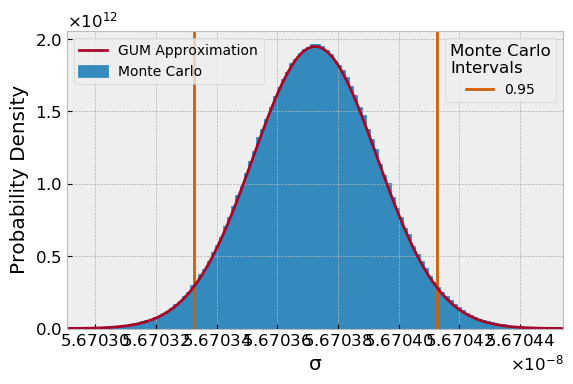

In [3]:
u = psluncert.UncertCalc()
u.set_function(sigma, name='sigma')

# Mu and c have 0 uncertainty. Just add their nominal values
u.set_input('M_u', nom=1E-3)
u.set_input('c', nom=299792458)

# Remaining inputs use values from Table 4
u.set_input('h', nom=6.62606957E-34, uname='u(h)', std=.00000029E-34)
u.set_input('R', nom=8.3144621, uname='u(R)', std=.0000075)
u.set_input('R_inf', nom=10973731.568539, uname='u(Rinf)', std=.000055)
u.set_input('A_r', nom=5.4857990946E-4, uname='u(A_r)', std=.0000000022E-4)
u.set_input('alpha', nom=7.2973525698e-3, uname='u(alpha)', std=.0000000024E-3)

# And calculate.
display(u.calculate())
u.out.plot_pdf(intervals=[.95]);

In [4]:
u.out.report_expanded()

### GUM Approximation


Interval |Min          |Max          |k     |Deg. Freedom |Expanded Uncertainty 
---------|-------------|-------------|------|-------------|---------------------
99.00%   |5.670320e-08 |5.670425e-08 |2.576 |inf          |5.3e-13              
95.00%   |5.670332e-08 |5.670413e-08 |1.960 |inf          |4.0e-13              
90.00%   |5.670339e-08 |5.670406e-08 |1.645 |inf          |3.4e-13              
68.00%   |5.670352e-08 |5.670393e-08 |0.994 |inf          |2.0e-13              

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min          |Max          |k     
---------|-------------|-------------|------
99.00%   |5.670320e-08 |5.670425e-08 |2.577 
95.00%   |5.670332e-08 |5.670413e-08 |1.961 
90.00%   |5.670339e-08 |5.670406e-08 |1.645 
68.00%   |5.670352e-08 |5.670393e-08 |0.994 

